# **BEHAVIORAL SEGMENTATION (CLUSTER ANALYSIS)**

**GAROFANO ROBERTA 503522**

Cluster Analysis is an unsupervised learning technique used to group unlabeled data into homogeneous sets, called clusters. Each cluster groups elements that have similar characteristics, while elements belonging to different clusters show more marked differences.


Its main advantages are:

Segmentation: Divides customers into meaningful groups that can be targeted separately.

Pattern recognition: Identify patterns in customer behaviors.

Decision-making simplicity: Supports business decisions based on objective data and analytical insights.

The dataset that will be used contains the usage behavior of around 9000 credit card users for the last six months. It is required to group credit card customers into several groups according to customer behavior to get an effective and efficient credit card marketing strategy.

The company in question is a large player in the credit card industry that serves customers in various market segments. With over 9,000 active customers analyzed in the last six months, the company is engaged in offering a wide range of financial products, including standard, premium and business credit cards, as well as lending and checking account services.
Strategic objective:

The company's focus is to maximize customer satisfaction by offering personalized credit cards and optimizing risk management.

In [ ]:

import pandas as pd
import zipfile
import os
import seaborn as sns
import numpy as np
url= 'https://github.com/Rob1602/NEWCLUSTERING/raw/main/archive(5).zip'

df = pd.read_csv(url)


print(f"Dataset shape: {df.shape}")
print("First few rows of the dataset:")
pd.set_option('display.max_columns', None)
print(df.head())

Dataset shape: (8950, 18)
First few rows of the dataset:
  cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                 

CUST_ID ->	Credit card holder ID


BALANCE ->	Remaining account balance available for purchases


BALANCE_FREQUENCY ->	Balance update frequency (between 0 and 1)


PURCHASES ->	Account purchases amount


ONEOFF_PURCHASES ->	Maximum purchase amount in single transaction


INSTALLMENTS_PURCHASES ->	Amount purchase in installment


CASH_ADVANCE ->	The user's advance payment in cash


PURCHASES_FREQUENCY ->	Frequency of purchases made on a regular basis (between 0 and 1)


ONEOFF_PURCHASES_FREQUENCY ->	Frequency of purchases made in single transaction (between 0 and 1)


PURCHASES_INSTALLMENTS_FREQUENCY ->	Frequency of done purchases in installments (between 0 and 1)


CASH_ADVANCE_FREQUENCY -> 	Frequency of cash in advance


CASH_ADVANCE_TRX -> 	"Cash in advance" total transactions


PURCHASES_TRX ->	Purchase total transactions


CREDIT_LIMIT ->	Credit card limit of an user


PAYMENTS ->	Total amount paid by the user


MINIMUM_PAYMENTS ->	Minimum payment amount made by user


PRC_FULL_PAYMENT ->	Percent of total charge paid by the user


TENURE ->	Credit card tenure of an user

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

The dataset column contains 0 null-values, except for the column 'minimum_payments' which contains 313 null values and 'credit_limit' (1 missing value).
All the columns are numerical (except 'cost_id').

In [ ]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns Description:")
print(df[numeric_columns].describe())


Numeric Columns Description:
            balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000  

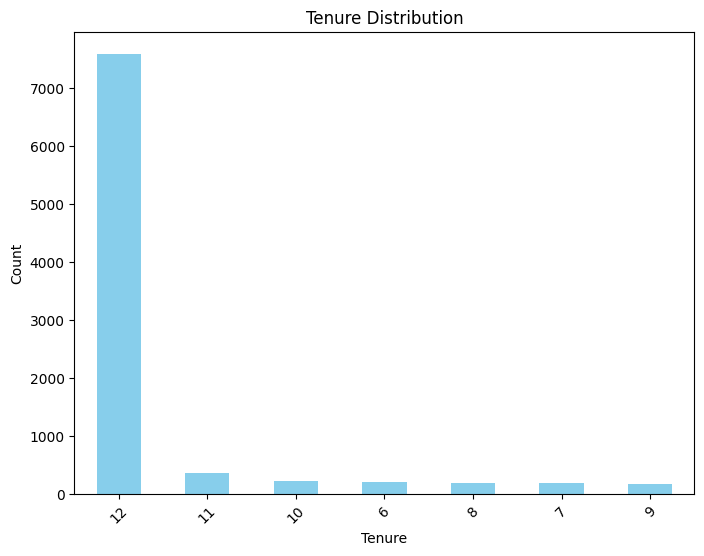

In [ ]:
import matplotlib.pyplot as plt

status_counts = df['tenure'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 When using a credit card, most credit card customers prefer 12 months tenure compared to other tenure options. This can be concluded that customers are more likely to repay credits in the long term with the consequence of a higher interest rate.

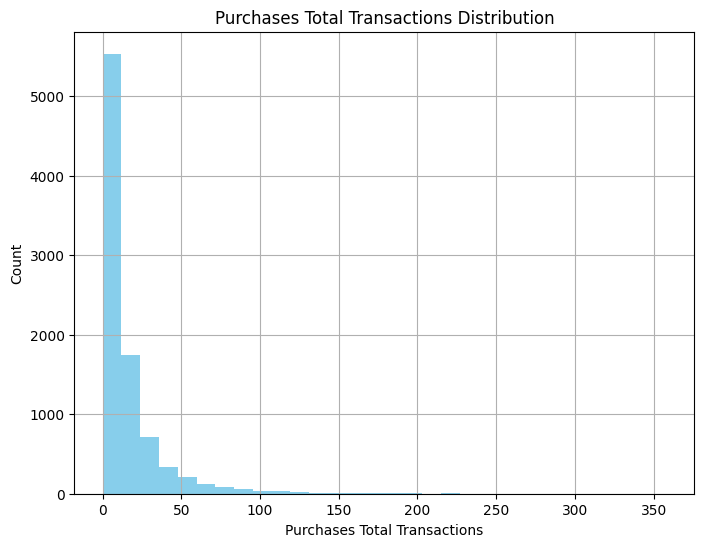

In [ ]:
plt.figure(figsize=(8, 6))
df['purchases_trx'].hist(bins=30, color='skyblue')  # Aumenta il numero di bin a seconda della distribuzione
plt.title('Purchases Total Transactions Distribution')
plt.xlabel('Purchases Total Transactions')
plt.ylabel('Count')
plt.show()


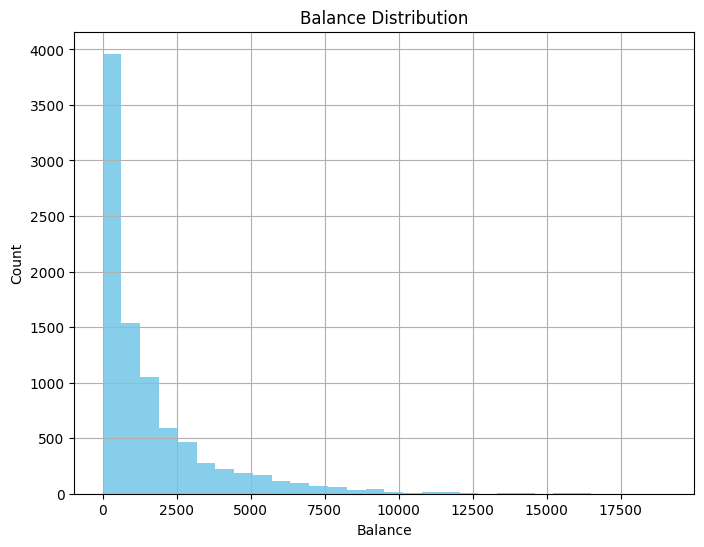

In [ ]:
plt.figure(figsize=(8, 6))
df['balance'].hist(bins=30, color='skyblue')  # Aumenta il numero di bin a seconda della distribuzione
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

 When investigating the BALANCE column further, it seems that there are many credit cards with 0 balances. It is also supported with so many 0 purchase amounts in PURCHASE column. Based on those results, it can be assumed that some users are intentionally keeping the balance low in their account in order to get high credit limit, which affects to increase credit utilization ratio and the credit score.





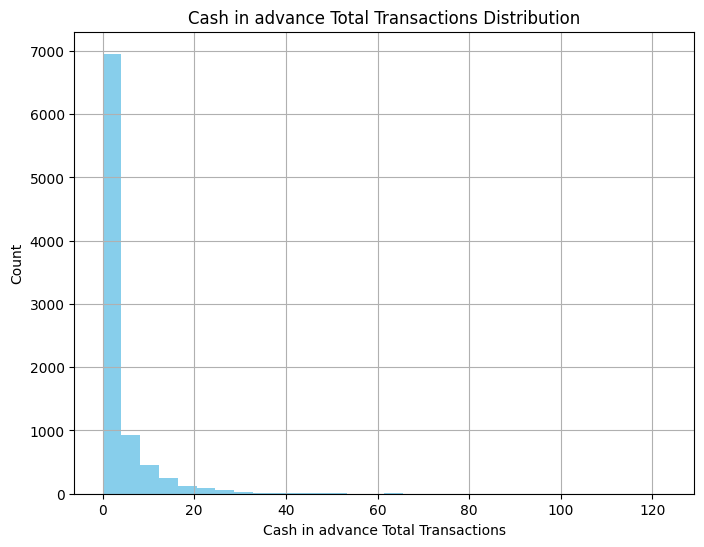

In [ ]:
plt.figure(figsize=(8, 6))
df['cash_advance_trx'].hist(bins=30, color='skyblue')
plt.title('Cash in advance Total Transactions Distribution')
plt.xlabel('Cash in advance Total Transactions')
plt.ylabel('Count')
plt.show()


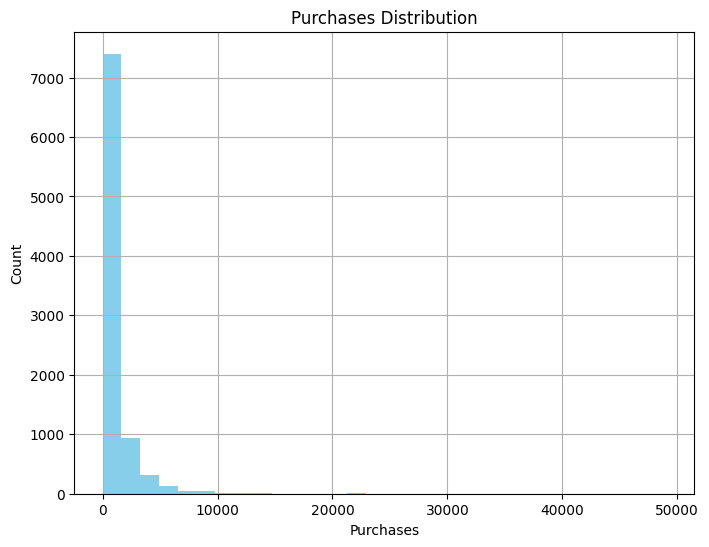

In [ ]:
plt.figure(figsize=(8, 6))
df['purchases'].hist(bins=30, color='skyblue')
plt.title('Purchases Distribution')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.show()

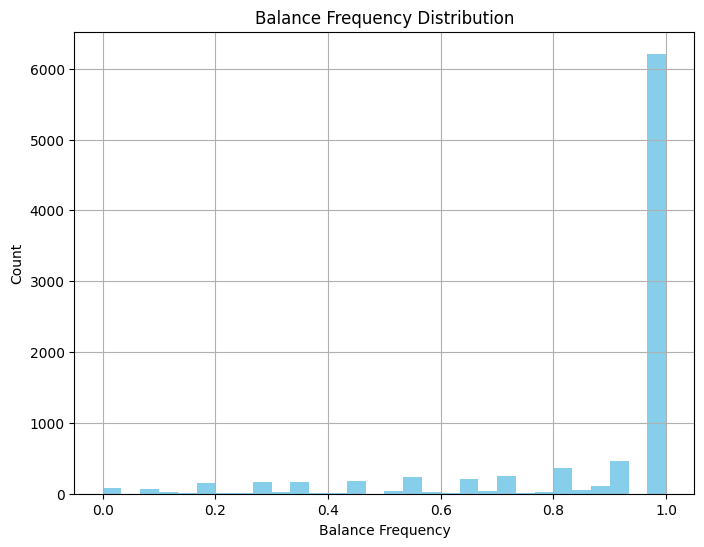

In [ ]:
plt.figure(figsize=(8, 6))
df['balance_frequency'].hist(bins=30, color='skyblue')
plt.title('Balance Frequency Distribution')
plt.xlabel('Balance Frequency')
plt.ylabel('Count')
plt.show()


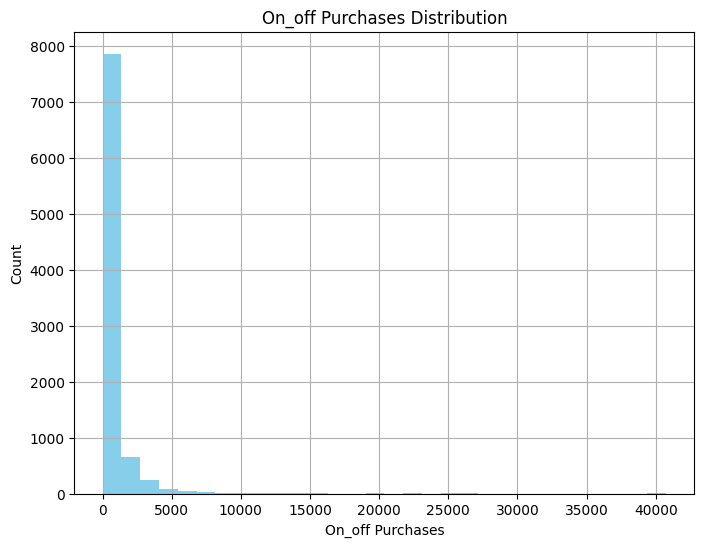

In [ ]:
plt.figure(figsize=(8, 6))
df['oneoff_purchases'].hist(bins=30, color='skyblue')
plt.title('On_off Purchases Distribution')
plt.xlabel('On_off Purchases')
plt.ylabel('Count')
plt.show()


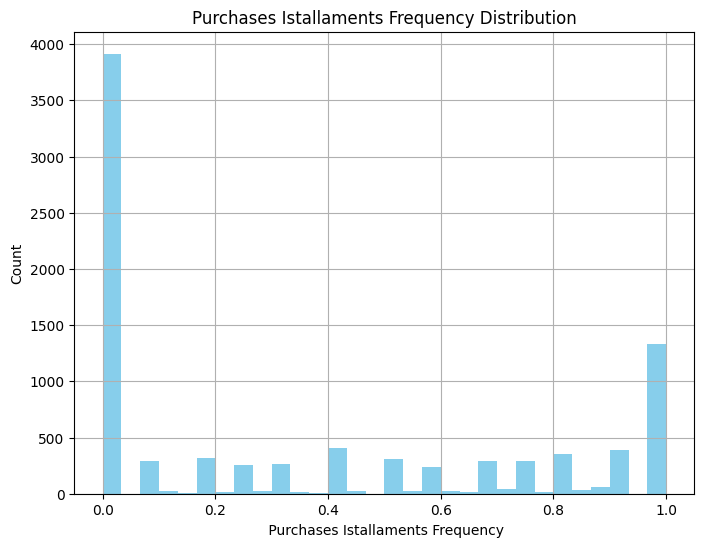

In [ ]:
plt.figure(figsize=(8, 6))
df['purchases_installments_frequency'].hist(bins=30, color='skyblue')
plt.title('Purchases Istallaments Frequency Distribution')
plt.xlabel(' Purchases Istallaments Frequency')
plt.ylabel('Count')
plt.show()


Most of credit card accounts have 1 score in BALANCE_FREQUENCY column, which indicates that most customers use credit card frequently. However, this is different from ONEOFF_PURCHASES and PURCHASES_INSTALLMENT_FREQUENCY, where the majority of customers do not use credit cards for one-time transactions or payments in installments.

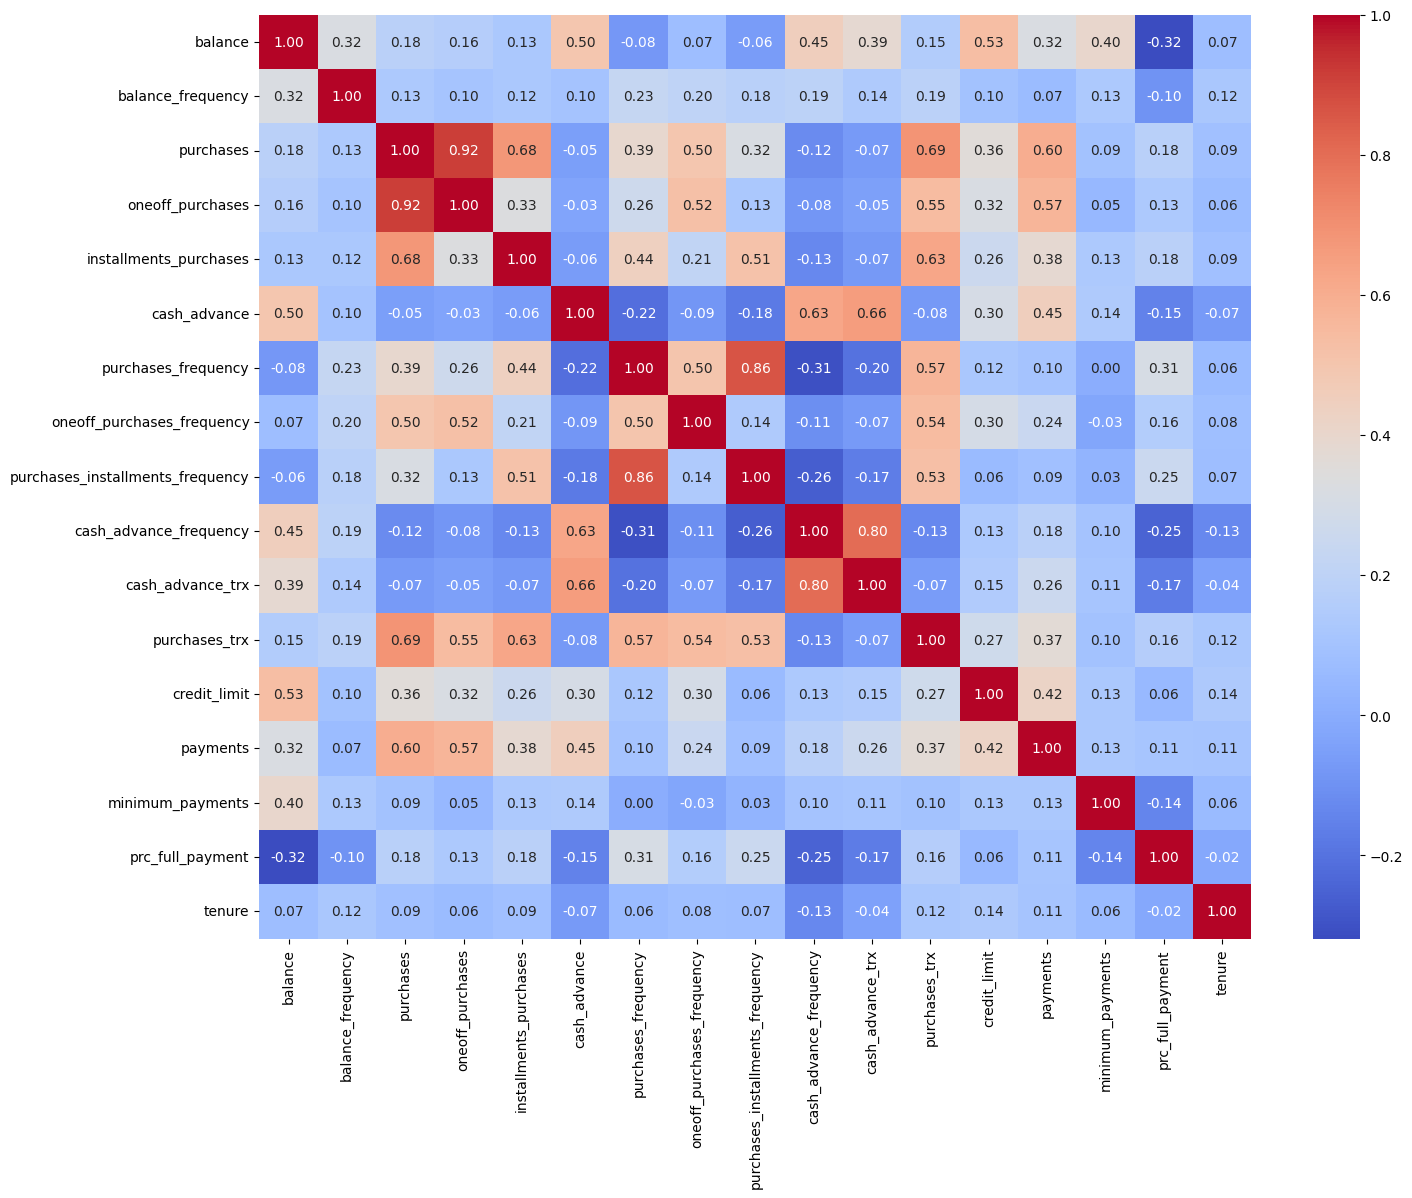

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)


plt.xticks(rotation=90)


plt.yticks(rotation=0)


plt.show()



Examples of high correlation variables are PURCHASES and ONEOFF_PURCHASES, with a 0.92 correlation value. This suggests that total purchases and one-off purchases are closely related. Many customers who make one-off purchases tend to account for a large percentage of total purchases.

Another example is CASH_ADVANCE_TRX with CASH_ADVANCE_FREQUENCY with a 0.8 correlation value. This is quite predictable. A larger amount of cash advance is associated with a larger number of cash advance transactions. Customers who take large cash advances tend to do so frequently.


There is a moderate correlation between the frequency with which customers make purchases in installments (PURCHASES_INSTALLMENTS_FREQUENCY) and the total amount of these purchases (INSTALLMENTS_PURCHASES), suggesting that those who use the installment system frequently also tend to make larger purchase amounts.

.


      


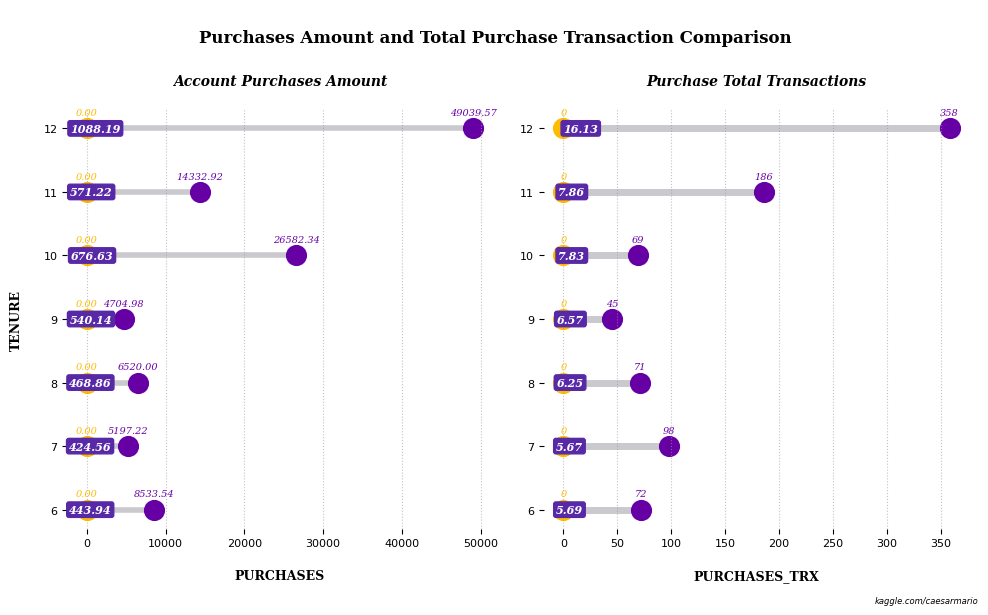

In [ ]:
import matplotlib.pyplot as plt


title = dict(fontsize=10, fontfamily='serif', style='italic', weight='bold', ha='center')
grid_style = dict(alpha=0.6, color='#9B9A9C', linestyle='dotted', zorder=1)
sct_style = dict(s=175, linewidth=2)
xy_label = dict(fontweight='bold', fontsize=9, fontfamily='serif')
ann_style = dict(xytext=(0, 0), textcoords='offset points', va='center', ha='center', style='italic', fontfamily='serif')
color_palette = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']

tenure = sorted(df['tenure'].unique())


eda2_1 = df[['purchases', 'tenure']].groupby('tenure').agg(
    MIN=('purchases', 'min'),
    AVG=('purchases', 'mean'),
    MAX=('purchases', 'max')
).reset_index()


eda2_2 = df[['purchases_trx', 'tenure']].groupby('tenure').agg(
    MIN=('purchases_trx', 'min'),
    AVG=('purchases_trx', 'mean'),
    MAX=('purchases_trx', 'max')
).reset_index()


fig = plt.figure(figsize=(10, 6))
plt.suptitle('\nPurchases Amount and Total Purchase Transaction Comparison', fontweight='heavy', fontsize=12, fontfamily='serif')

plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_left = plt.gca()


plt.scatter(x=eda2_1['MIN'], y=eda2_1['tenure'], c='#FFBB00', **sct_style)
plt.scatter(x=eda2_1['MAX'], y=eda2_1['tenure'], c='#6600A5', **sct_style)


for i in range(len(tenure)):
    eda2_1_x = eda2_1[eda2_1['tenure'] == tenure[i]]
    plt.hlines(y=eda2_1_x['tenure'], xmin=eda2_1_x['MIN'], xmax=eda2_1_x['MAX'], linewidth=4, color='#CAC9CD', zorder=0)
    plt.annotate(f"{eda2_1_x['MIN'].values[0]:.2f}", xy=(eda2_1_x['MIN'].values[0], eda2_1_x['tenure'].values[0] + 0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate(f"{eda2_1_x['AVG'].values[0]:.2f}", xy=(eda2_1_x['AVG'].values[0], eda2_1_x['tenure'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate(f"{eda2_1_x['MAX'].values[0]:.2f}", xy=(eda2_1_x['MAX'].values[0], eda2_1_x['tenure'].values[0] + 0.25), color='#6600A5', fontsize=7, **ann_style)


for spine in axs_left.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES', **xy_label)
plt.ylabel('TENURE\n', **xy_label)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nAccount Purchases Amount\n', **title)


plt.subplot(1, 2, 2)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_right = plt.gca()

plt.scatter(x=eda2_2['MIN'], y=eda2_2['tenure'], c='#FFBB00', **sct_style)
plt.scatter(x=eda2_2['MAX'], y=eda2_2['tenure'], c='#6600A5', **sct_style)


for i in range(len(tenure)):
    eda2_2_x = eda2_2[eda2_2['tenure'] == tenure[i]]
    plt.hlines(y=eda2_2_x['tenure'], xmin=eda2_2_x['MIN'], xmax=eda2_2_x['MAX'], linewidth=5, color='#CAC9CD', zorder=0)
    plt.annotate(f"{eda2_2_x['MIN'].values[0]:.0f}", xy=(eda2_2_x['MIN'].values[0], eda2_2_x['tenure'].values[0] + 0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate(f"{eda2_2_x['AVG'].values[0]:.2f}", xy=(eda2_2_x['AVG'].values[0], eda2_2_x['tenure'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate(f"{eda2_2_x['MAX'].values[0]:.0f}", xy=(eda2_2_x['MAX'].values[0], eda2_2_x['tenure'].values[0] + 0.25), color='#6600A5', fontsize=7, **ann_style)


for spine in axs_right.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES_TRX', **xy_label)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nPurchase Total Transactions\n', **title)

plt.gcf().text(0.88, -0.01, 'kaggle.com/caesarmario', style='italic', fontsize=6)

plt.show()


It can be observed that credit card customers with a tenure of 12 months tend to have higher purchase amounts and more total purchase transactions compared to those with different tenure periods. This aligns with previous findings, indicating that customers are more inclined to repay debts over longer periods, potentially to take advantage of higher interest rates. Additionally, some customers intentionally avoid making any purchases or transactions (with 0 recorded transactions) to secure a higher credit limit, which in turn helps boost their credit scores and credit utilization ratios.

The graph also highlights an interesting trend: customers with a 10-month tenure show higher purchase amounts than those with an 11-month tenure. However, the opposite is true for the number of transactions, as 10-month tenure customers make fewer transactions than those with 11 months of tenure. Another notable example is the comparison between 7-month and 8-month tenure customers. Although 7-month tenure customers tend to spend less overall, they engage in more transactions than those with an 8-month tenure.

In [ ]:
df = df.drop(columns=['cust_id'])


I have to remove variables that are not needed for the clustering process. In this case, CUST_ID will be removed since it has unique values.

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

columns_with_missing = ['minimum_payments', 'credit_limit']


df_high_missing = df[columns_with_missing]


imputer = KNNImputer(n_neighbors=5)
df_imputed_high_missing = pd.DataFrame(imputer.fit_transform(df_high_missing), columns=columns_with_missing)

df[columns_with_missing] = df_imputed_high_missing


print(df[columns_with_missing].isnull().sum())

minimum_payments    0
credit_limit        0
dtype: int64


To handle missing values I used the KNN imputer because it allows for more intelligent imputation by considering the relationships between data points. Instead of simply filling missing values with a mean or median, the KNN imputer uses similar rows (nearest neighbors) to estimate the missing values, preserving the overall structure and relationships in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


df_numeric = df.select_dtypes(include=[np.number])


scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


df[df_numeric.columns] = df_numeric_scaled




The next step is normalizing the dataset. Normalization is crucial as it manages the dataset's variability, transforming the data into a defined range through a linear transformation. This process improves cluster quality and enhances the accuracy of clustering algorithms.I used a Standard Scaler to standardize the features.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


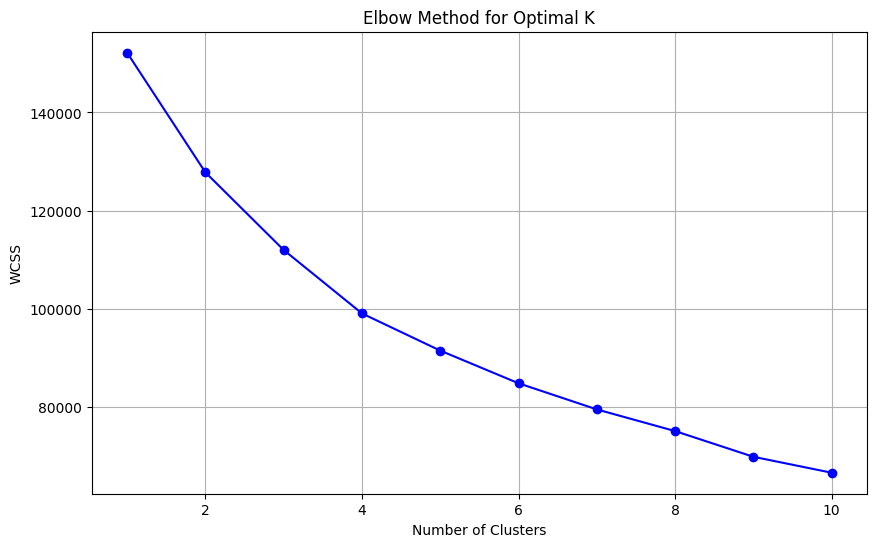

In [ ]:
# Create a list to store the WCSS for each number of clusters
wcss = []

# Run KMeans for different numbers of clusters and compute WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_numeric_scaled)
    wcss.append(kmeans.inertia_)  # WCSS is stored in the inertia_ attribute

# Plot the WCSS values to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# Assuming the optimal number of clusters is identified as k_optimal
k_optimal = 4  # Replace this with the actual value based on the elbow plot

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_numeric_scaled)

# Print the first few rows to see the cluster assignments
print(df[['Cluster']].head())


   Cluster
0        3
1        0
2        2
3        3
4        3


In [ ]:
#count the clients for each cluster

cluster_counts = df['Cluster'].value_counts()
print("Numero di clienti per cluster:")
print(cluster_counts)


Numero di clienti per cluster:
Cluster
3    3976
2    3367
0    1198
1     409
Name: count, dtype: int64


In [ ]:
# group the data by cluster and compute the mean
cluster_summary = df.groupby('Cluster').mean()
print("Media delle variabili per cluster:")
print(cluster_summary)


Media delle variabili per cluster:
          balance  balance_frequency  purchases  oneoff_purchases  \
Cluster                                                             
0        1.459578           0.384753  -0.234638         -0.163914   
1        0.954485           0.462694   3.125845          2.713251   
2       -0.321688           0.242574   0.109044          0.000926   
3       -0.265552          -0.368944  -0.343190         -0.230500   

         installments_purchases  cash_advance  purchases_frequency  \
Cluster                                                              
0                     -0.253747      1.688972            -0.504848   
1                      2.406470     -0.155091             1.136338   
2                      0.255904     -0.366373             0.983721   
3                     -0.387798     -0.182691            -0.797823   

         oneoff_purchases_frequency  purchases_installments_frequency  \
Cluster                                                 

In [ ]:

df_with_clusters = df.copy()

df_with_clusters['Cluster'] = kmeans.labels_

print(df_with_clusters.head())

df_with_clusters['Cluster'].value_counts()


    balance  balance_frequency  purchases  oneoff_purchases  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   installments_purchases  cash_advance  purchases_frequency  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451      

,count
Cluster,
3,3976
2,3367
0,1198
1,409


In [ ]:

cluster_summary = df_with_clusters.groupby('Cluster').mean()


print(cluster_summary)


          balance  balance_frequency  purchases  oneoff_purchases  \
Cluster                                                             
0        1.459578           0.384753  -0.234638         -0.163914   
1        0.954485           0.462694   3.125845          2.713251   
2       -0.321688           0.242574   0.109044          0.000926   
3       -0.265552          -0.368944  -0.343190         -0.230500   

         installments_purchases  cash_advance  purchases_frequency  \
Cluster                                                              
0                     -0.253747      1.688972            -0.504848   
1                      2.406470     -0.155091             1.136338   
2                      0.255904     -0.366373             0.983721   
3                     -0.387798     -0.182691            -0.797823   

         oneoff_purchases_frequency  purchases_installments_frequency  \
Cluster                                                                 
0                 

In [ ]:
cluster_summary = (
    df_with_clusters
    .groupby('Cluster')
    .agg(
        avg_balance = ('balance', 'mean'),
        avg_purchases = ('purchases', 'mean'),
        avg_credit_limit = ('credit_limit', 'mean'),
        avg_cash_advance = ('cash_advance', 'mean'),
        avg_payments = ('payments', 'mean'),
        mode_tenure = ('tenure', lambda x: x.value_counts().index[0]),
        mode_full_payment = ('prc_full_payment', lambda x: x.value_counts().index[0])
    )
    .reset_index()
    .sort_values('avg_balance'))


print(cluster_summary)


   Cluster  avg_balance  avg_purchases  avg_credit_limit  avg_cash_advance  \
2        2    -0.321688       0.109044         -0.077255         -0.366373   
3        3    -0.265552      -0.343190         -0.334468         -0.182691   
1        1     0.954485       3.125845          1.429913         -0.155091   
0        0     1.459578      -0.234638          0.839004          1.688972   

   avg_payments  mode_tenure  mode_full_payment  
2     -0.138502      0.36068          -0.525551  
3     -0.262060      0.36068          -0.525551  
1      1.919096      0.36068          -0.525551  
0      0.603821      0.36068          -0.525551  


Cluster 2: This cluster represents users with low levels of card usage, low balance, and minimal purchases.

Cluster 3:  This cluster represents customers who use credit cards infrequently but have moderate experience (tenure of 8 months). Although they do not make many purchases, they make regular payments.

Cluster 1: This cluster represents customers with higher balances, a higher credit limit, and regular payments. They may be more creditworthy users, but with a lower propensity to purchase.

Cluster 0: This cluster represents high-utilization customers with high credit limits and cash advances. They are likely the most active customers from a transactional perspective and may be a high-value segment for marketing strategies.

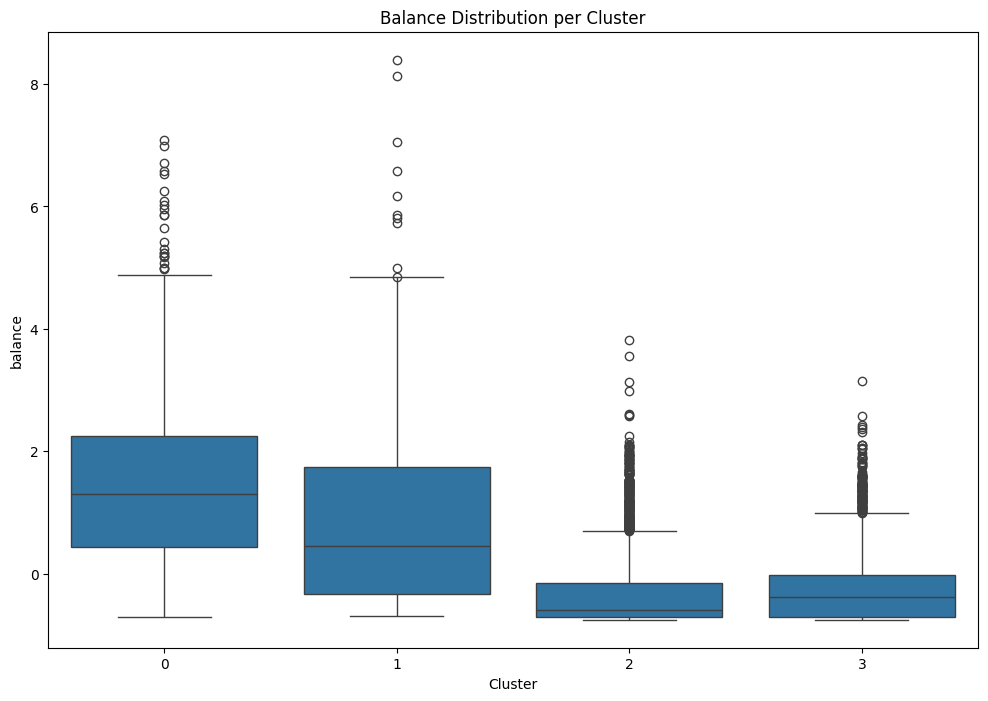

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='balance', data=df_with_clusters)
plt.title('Balance Distribution per Cluster')
plt.show()


Balance is clearly a key variable to distinguish high activity customers (Cluster 0 and 1) from those with low card usage (Cluster 2 and 3).

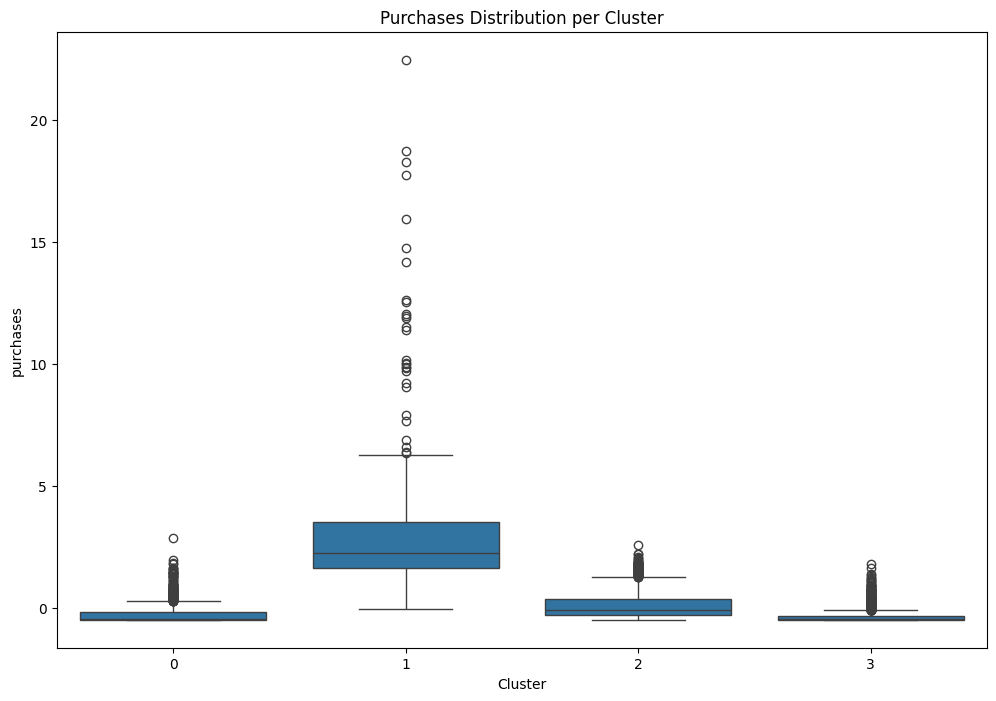

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='purchases', data=df_with_clusters)
plt.title('Purchases Distribution per Cluster')
plt.show()


The purchases confirm the distinction between high-spending customers (Cluster 1) and customers with low levels of use for purchases (Cluster 0, 2 and 3).

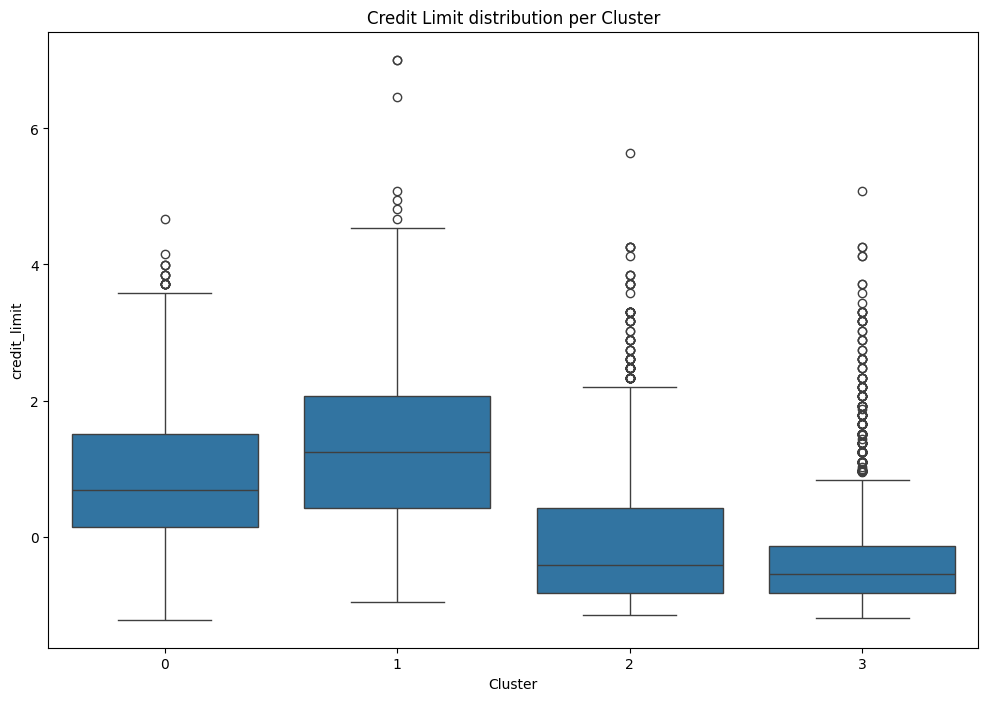

In [ ]:


plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='credit_limit', data=df_with_clusters)
plt.title('Credit Limit distribution per Cluster')
plt.show()


The credit limit is a feature that helps identify customers with greater credit confidence (Cluster 0 and 1) compared to those with less access (Cluster 2 and 3).

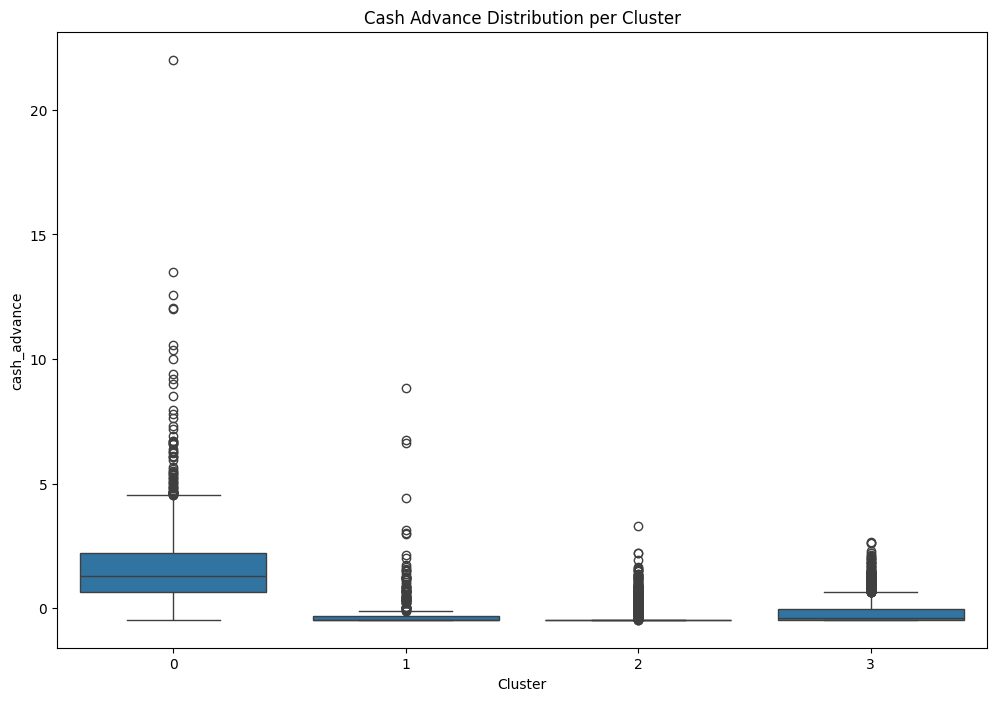

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='cash_advance', data=df_with_clusters)
plt.title('Cash Advance Distribution per Cluster')
plt.show()


Cash advances are a distinctive feature for Cluster 0, which also uses the card for this purpose, while the other clusters tend to use it more for purchases or not at all.

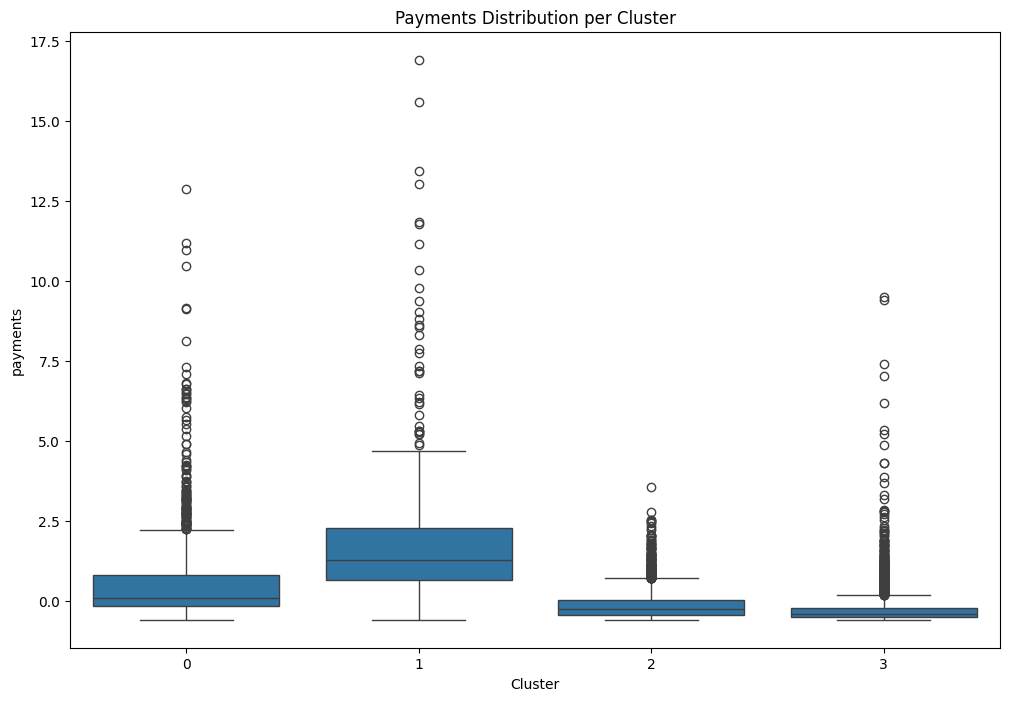

In [ ]:


plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='payments', data=df_with_clusters)
plt.title('Payments Distribution per Cluster')
plt.show()


Cluster 1 is characterized by customers who make high and regular payments, while Cluster 0 may have customers who accumulate more debt without paying as regularly.

<ipython-input-33-30463017de04>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='tenure', data=tenure_means, palette='viridis')


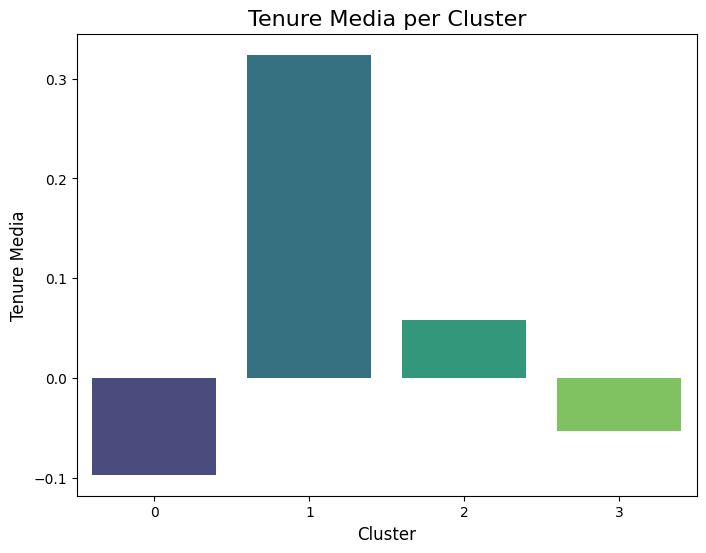

In [ ]:



tenure_means = df_with_clusters.groupby('Cluster')['tenure'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='tenure', data=tenure_means, palette='viridis')

plt.title('Tenure Media per Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Tenure Media', fontsize=12)
plt.show()
